# Real Data Example: PhysioNet Challenge 2019 Data in the `EHRData` Format

This tutorial demonstrates how `EHRData` structures real-world longitudinal clinical data using the **PhysioNet Challenge 2019** (Early Prediction of Sepsis from Clinical Data) dataset.

```{note}
It is helpful to check out the [Getting started with EHRData](getting_started) to learn the basics of `EHRData` before diving into this tutorial.
```

The [PhysioNet Challenge 2019](https://physionet.org/content/challenge-2019/1.0.0/) dataset contains ICU patient data. It was designed to encourage the development of algorithms for early detection of sepsis using physiological data {cite}`reyna2020early` {cite}`goldberger2000physiobank`.

## Dataset Overview

The dataset includes:
- **40,336 ICU patients** from two hospital systems
- **35 time-dependent clinical variables** (vitals, lab values, etc.)
- **5 static features**: Age, Gender, Unit1, Unit2, HospAdmTime
- **Hourly measurements** with variable-length stays
- **Outcome**: `SepsisLabel` - binary indicator of sepsis onset

Key clinical variables include:
- **Vital signs**: HR, O2Sat, Temp, SBP, MAP, DBP, Resp
- **Laboratory values**: Glucose, Lactate, Creatinine, Bilirubin, WBC, Platelets
- **Blood gas**: pH, PaCO2, SaO2, BaseExcess, HCO3, FiO2

Let's explore how `EHRData` organizes this complex data structure!

## Loading the Dataset

The `ehrdata` package provides multiple datasets out-of-the-box, and PhysioNet 2019 is one of them.

See {func}`~ehrdata.dt.physionet2019` for more details about how the dataset is loaded.

In [1]:
import ehrdata as ed
import numpy as np
import matplotlib.pyplot as plt

This downloads the data if needed and processes it into an `EHRData` object:


In [2]:
edata = ed.dt.physionet2019(layer="tem_data", n_samples=1000)
edata

View of EHRData object with n_obs × n_vars × n_t = 1000 × 35 × 48
    obs: 'Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'training_Set'
    var: 'Parameter'
    tem: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47'
    layers: 'tem_data'
    shape of .tem_data: (1000, 35, 48)

```{note}
The first time you run this, it will download ~40MB of data. Subsequent runs will use the cached version.
We use `n_samples=1000` to speed up the tutorial - remove this parameter to load the full dataset of 40,336 patients.
```

## Reminder: the EHRData Structure

<p style="text-align:center; padding: 2em 0;">
<img src="../_static/tutorial_images/ehrdata_logo.png" width="400" height="400" alt="Logo">
</p>

An `EHRData` object organizes data across three dimensions:

- **`n_obs`**: Number of observations (patients/ICU stays)
- **`n_vars`**: Number of variables (clinical parameters)
- **`n_tem`**: Number of temporal measurements (time points)

Let's explore its key components with PhysioNet Challenge 2019 data!

### The `.layers` Attribute: Time Series Data

The `.layers` attribute contains the 3D tensor of shape `(n_obs, n_vars, n_tem)` with all time series measurements:


In [3]:
print(f"Shape of layers: {edata.layers['tem_data'].shape}")
print(f"Data type: {edata.layers['tem_data'].dtype}")
print("\nThis represents:")
print(f"  - {edata.n_obs} patients")
print(f"  - {edata.n_vars} clinical variables")
print(f"  - {edata.n_t} time intervals (hours)")

Shape of layers: (1000, 35, 48)
Data type: float64

This represents:
  - 1000 patients
  - 35 clinical variables
  - 48 time intervals (hours)


### The `.obs` Attribute: Static Patient Metadata

The `.obs` DataFrame contains static information for each patient:


In [4]:
edata.obs.head()

,Age,Gender,Unit1,Unit2,HospAdmTime,training_Set
RecordID,,,,,,
p000012,81.64,1.0,1.0,0.0,-0.03,training_setA
p000108,88.90,0.0,NaN,NaN,-76.49,training_setA
p000142,55.89,1.0,1.0,0.0,-0.02,training_setA
p000197,22.94,1.0,NaN,NaN,-14.35,training_setA
p000211,70.50,1.0,1.0,0.0,-67.75,training_setA


The `.obs` table here includes:
- **Static variables**: Age, Gender, Unit1 (medical ICU), Unit2 (surgical ICU), HospAdmTime (hours before ICU), training_Set (dataset provided split)

Note that the index is the `RecordID` - a unique identifier for each patient.

### The `.var` Attribute: Variable Metadata

The `.var` DataFrame can contains information about each clinical variable being measured. Here, this is just the parameter name; it can be expanded to include e.g. Units, or alternative names.


In [5]:
print(f"Number of variables: {edata.n_vars}\n")
print("Clinical variables:")
edata.var

Number of variables: 35

Clinical variables:


,Parameter
Parameter,
AST,AST
Alkalinephos,Alkalinephos
BUN,BUN
BaseExcess,BaseExcess
Bilirubin_direct,Bilirubin_direct
Bilirubin_total,Bilirubin_total
Calcium,Calcium
Chloride,Chloride
Creatinine,Creatinine


### The `.tem` Attribute: Temporal Information

The `.tem` DataFrame contains information about the time intervals:


In [6]:
print(f"Number of time intervals: {edata.n_t}\n")
edata.tem.head(10)

Number of time intervals: 48



,interval_start_offset,interval_end_offset
interval_step,,
0,0 days 00:00:00,0 days 01:00:00
1,0 days 01:00:00,0 days 02:00:00
2,0 days 02:00:00,0 days 03:00:00
3,0 days 03:00:00,0 days 04:00:00
4,0 days 04:00:00,0 days 05:00:00
5,0 days 05:00:00,0 days 06:00:00
6,0 days 06:00:00,0 days 07:00:00
7,0 days 07:00:00,0 days 08:00:00
8,0 days 08:00:00,0 days 09:00:00


## Exploring Individual Patients

Let's visualize the time series data for a single patient to understand the temporal structure:

In [7]:
# Select the first patient
patient_idx = 0
patient_id = edata.obs.index[patient_idx]
patient_data = edata[patient_idx, :, :]

print(f"Patient ID: {patient_id}")
print(f"Age: {edata.obs.loc[patient_id, 'Age']:.1f} years")
print(f"Gender: {'Male' if edata.obs.loc[patient_id, 'Gender'] == 1 else 'Female'}")
print(f"Data shape: {patient_data.layers['tem_data'].shape}")

Patient ID: p000012
Age: 81.6 years
Gender: Male
Data shape: (1, 35, 48)


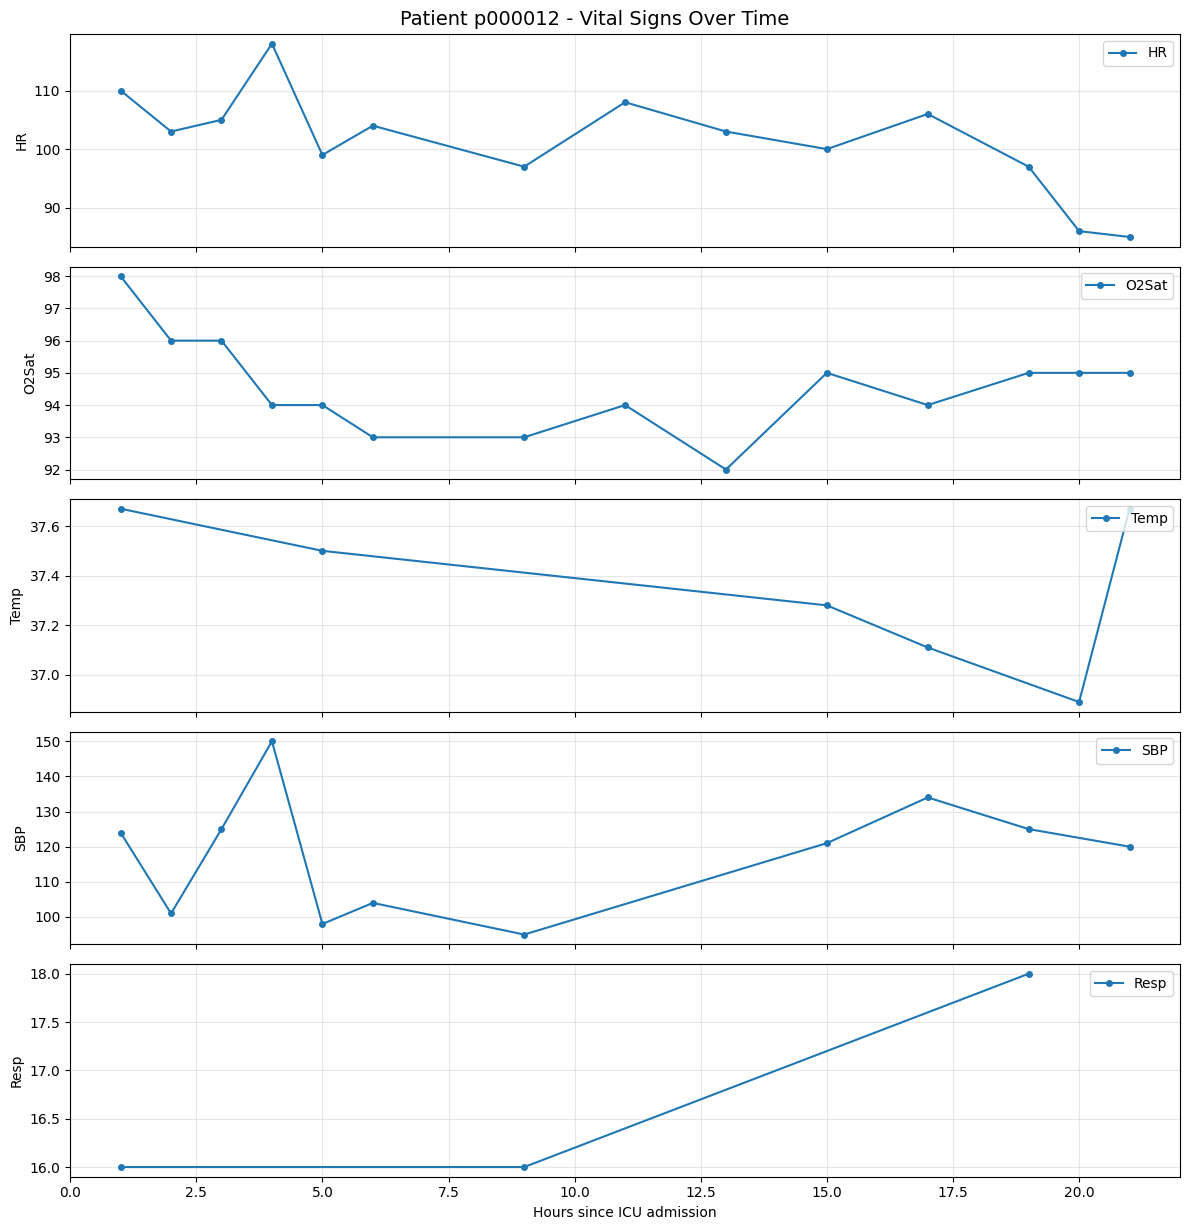

In [8]:
# Select a few vital signs to visualize
vital_signs = ["HR", "O2Sat", "Temp", "SBP", "Resp"]
var_indices = [list(edata.var_names).index(v) for v in vital_signs if v in edata.var_names]

fig, axes = plt.subplots(len(var_indices), 1, figsize=(12, 2.5 * len(var_indices)), sharex=True)

for ax, var_idx in zip(axes, var_indices, strict=False):
    var_name = edata.var_names[var_idx]
    values = edata.layers["tem_data"][patient_idx, var_idx, :]
    time_points = np.arange(len(values))

    # Plot only non-NaN values
    mask = ~np.isnan(values)
    ax.plot(time_points[mask], values[mask], "o-", markersize=4, label=var_name)
    ax.set_ylabel(var_name)
    ax.legend(loc="upper right")
    ax.grid(visible=True, alpha=0.3)

axes[-1].set_xlabel("Hours since ICU admission")
fig.suptitle(f"Patient {patient_id} - Vital Signs Over Time", fontsize=14)
plt.tight_layout()
plt.show()

These plots illustrate how variables such as `HR` develop over time for an individual patient.

The good news: You don't need to write a lot of code for such visualizations anymore!

`ehrapy` has many utility functions for processing and vizualizing data in the `EHRData` format - for a fancy version of this plot here, available interactively powered by `bokeh`, see for instance {func}`~ehrapy.plot.timeseries`

## Subsetting and Filtering

`EHRData` supports powerful subsetting operations similar to numpy arrays:


In [9]:
# Get patients who developed sepsis (SepsisLabel = 1 at any time point)
sepsis_var_idx = list(edata.var_names).index("SepsisLabel")
sepsis_data = edata.layers["tem_data"][:, sepsis_var_idx, :]

# A patient has sepsis if SepsisLabel is 1 at any time point
has_sepsis = np.nanmax(sepsis_data, axis=1) == 1

print(f"Patients with sepsis: {has_sepsis.sum()} out of {len(has_sepsis)}")
print(f"Sepsis rate: {has_sepsis.mean() * 100:.1f}%")

# Subset to sepsis patients
sepsis_patients = edata[has_sepsis, :, :]
print(
    f"\nSubsetted EHRData shape: {sepsis_patients.n_obs} patients × {sepsis_patients.n_vars} variables × {sepsis_patients.n_t} hours"
)

Patients with sepsis: 48 out of 1000
Sepsis rate: 4.8%

Subsetted EHRData shape: 48 patients × 35 variables × 48 hours


## Choosing different time intervals

Depending on the question at hand, different time intervals are of interest.

For the `physionet2019()`, in the intensive care unit setting, the observations of patient data happen within minutes to hours, and usually only for a few days.

For observational health data, the observations happen rather across weeks or months, and span for many years.

The `physionet2019()` function provides arguments to specify more about the time intervals. We can for instance load the data with a different time resolution (2-hour intervals, 24 intervals total)


In [10]:
edata_2h = ed.dt.physionet2019(
    layer="tem_data", n_samples=1000, interval_length_number=2, interval_length_unit="h", num_intervals=24
)
print(f"Shape with 2-hour intervals: {edata_2h.layers['tem_data'].shape}")
print(f"Now we have {edata_2h.n_t} time points instead of {edata.n_t}")

Shape with 2-hour intervals: (1000, 35, 24)
Now we have 24 time points instead of 48


If we plot this again, we can see the data is less fine-grained now:

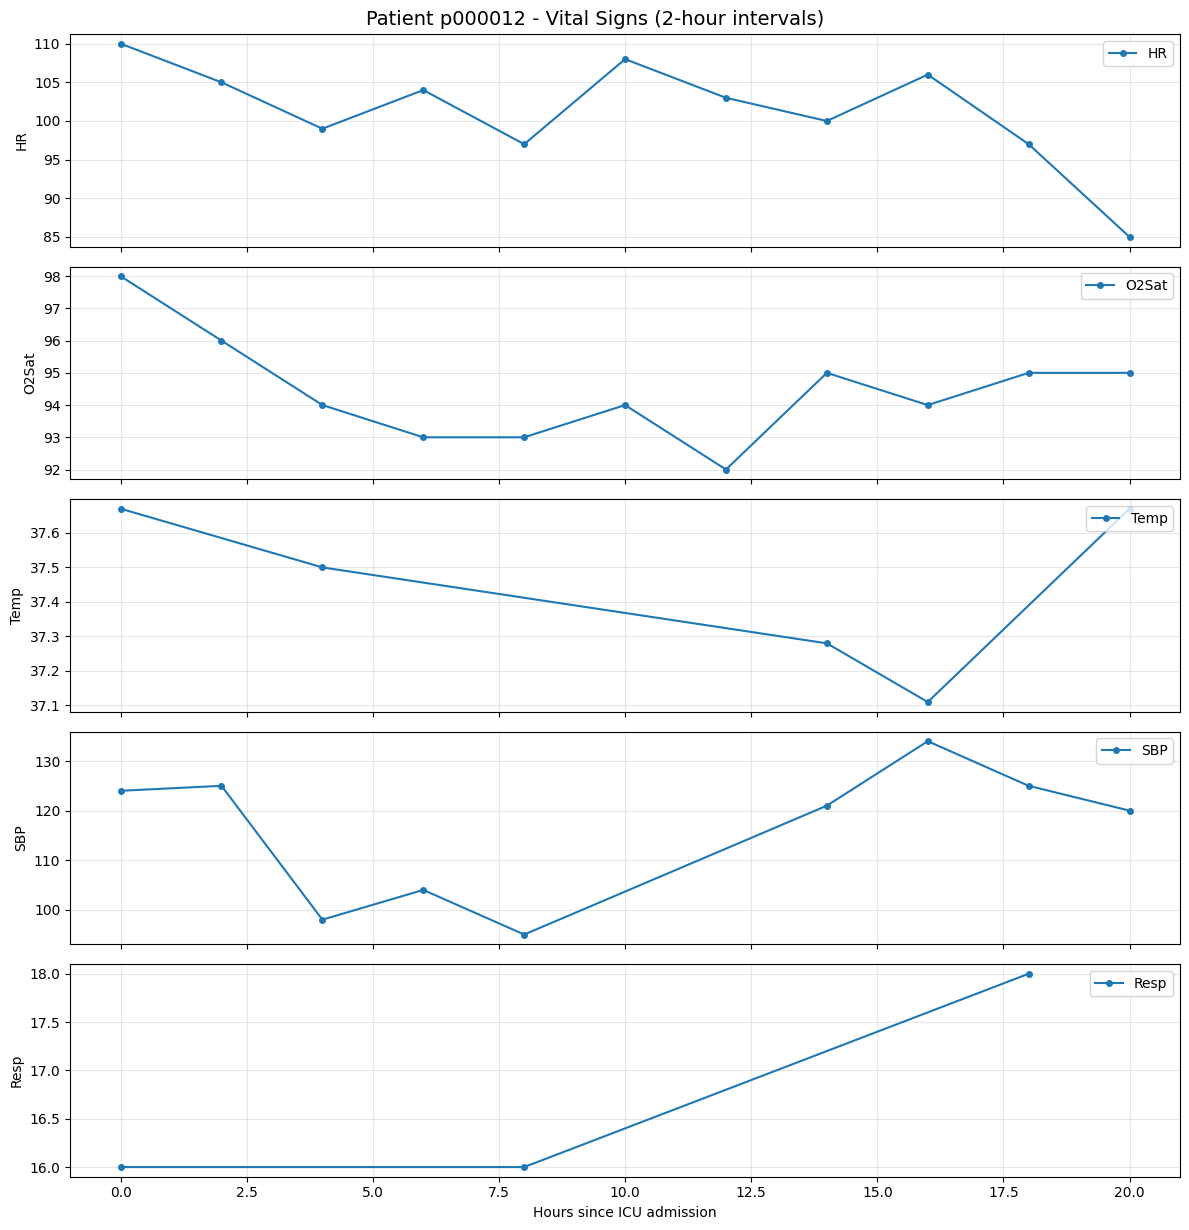

In [11]:
# Visualize the same patient with 2-hour intervals
fig, axes = plt.subplots(len(var_indices), 1, figsize=(12, 2.5 * len(var_indices)), sharex=True)

for ax, var_idx in zip(axes, var_indices, strict=False):
    var_name = edata_2h.var_names[var_idx]
    values = edata_2h.layers["tem_data"][patient_idx, var_idx, :]
    time_points = np.arange(len(values)) * 2  # 2-hour intervals

    mask = ~np.isnan(values)
    ax.plot(time_points[mask], values[mask], "o-", markersize=4, label=var_name)
    ax.set_ylabel(var_name)
    ax.legend(loc="upper right")
    ax.grid(visible=True, alpha=0.3)

axes[-1].set_xlabel("Hours since ICU admission")
fig.suptitle(f"Patient {patient_id} - Vital Signs (2-hour intervals)", fontsize=14)
plt.tight_layout()
plt.show()

## Summary

In this tutorial, we learned:

- ✅ How to load the PhysioNet 2019 dataset with `ed.dt.physionet2019()`
- ✅ The structure of `EHRData` objects with three dimensions: obs × vars × tem
- ✅ The `layers`, `obs`, `var`, and `tem` fields of `EHRData`
- ✅ How to subset and filter the data (e.g., sepsis patients)
- ✅ How to customize the data loading parameters (time intervals, number of samples)

## Next Tutorial

Continue with **[OMOP Introduction](omop_intro)** to learn how to read any dataset in the OMOP Common Data Model.

## Further Resources

- **[PhysioNet 2019 Challenge](https://physionet.org/content/challenge-2019/1.0.0/)** - The original challenge and dataset description
- **[Sepsis-3 Definitions](https://jamanetwork.com/journals/jama/fullarticle/2492881)** - Clinical definitions of sepsis